In [7]:
import pandas as pd
import numpy as np
import sqlite3

DATA

1. Wczytać dane dotyczące zawodników do ramki danych

In [9]:
athletes = pd.read_csv('../analiza/data.csv')

FileNotFoundError: [Errno 2] No such file or directory: '../analiza/data.csv'

2. Wylistować dostępne kolumny

In [ ]:
athletes.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

3. Wypisać miejsca w których organizowane były igrzyska (bez powtórzeń)

In [ ]:
athletes['City'].unique()

array(['Barcelona', 'London', 'Antwerpen', 'Paris', 'Calgary',
       'Albertville', 'Lillehammer', 'Los Angeles', 'Salt Lake City',
       'Helsinki', 'Lake Placid', 'Sydney', 'Atlanta', 'Stockholm',
       'Sochi', 'Nagano', 'Torino', 'Beijing', 'Rio de Janeiro', 'Athina',
       'Squaw Valley', 'Innsbruck', 'Sarajevo', 'Mexico City', 'Munich',
       'Seoul', 'Berlin', 'Oslo', "Cortina d'Ampezzo", 'Melbourne',
       'Roma', 'Amsterdam', 'Montreal', 'Moskva', 'Tokyo', 'Vancouver',
       'Grenoble', 'Sapporo', 'Chamonix', 'St. Louis', 'Sankt Moritz',
       'Garmisch-Partenkirchen'], dtype=object)

4. Wypisać miejsca, w których były organizowane letnie igrzyska (bez powtórzeń)

In [ ]:
athletes[athletes['Season']=='Summer']['City'].unique()

array(['Barcelona', 'London', 'Antwerpen', 'Paris', 'Los Angeles',
       'Helsinki', 'Sydney', 'Atlanta', 'Stockholm', 'Beijing',
       'Rio de Janeiro', 'Athina', 'Mexico City', 'Munich', 'Seoul',
       'Berlin', 'Melbourne', 'Roma', 'Amsterdam', 'Montreal', 'Moskva',
       'Tokyo', 'St. Louis'], dtype=object)

5. Sprawdzić ile konkurencji było rozgrywanych na letnich igrzyskach w roku 2012

In [ ]:
len(athletes[athletes['Year']==2012]['Sport'].unique())

32

6. Wypisać wszystkich złotych medalistów z letnich igrzysk w roku 2016

In [ ]:
athletes[(athletes['Medal']=='Gold')&(athletes['Year']==2016)]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
1080,608,Ahmad Abughaush,M,20.0,178.0,68.0,Jordan,JOR,2016 Summer,2016,Summer,Rio de Janeiro,Taekwondo,Taekwondo Men's Featherweight,Gold
1495,832,Nicola Virginia Adams,F,33.0,164.0,51.0,Great Britain,GBR,2016 Summer,2016,Summer,Rio de Janeiro,Boxing,Boxing Women's Flyweight,Gold
1849,1017,Nathan Ghar-Jun Adrian,M,27.0,198.0,100.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 4 x 100 metres Freestyle Relay,Gold
1850,1017,Nathan Ghar-Jun Adrian,M,27.0,198.0,100.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 4 x 100 metres Medley Relay,Gold
2453,1374,Tontowi Ahmad,M,29.0,179.0,72.0,Indonesia-1,INA,2016 Summer,2016,Summer,Rio de Janeiro,Badminton,Badminton Mixed Doubles,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269277,134740,Zheng Shuyin,F,22.0,188.0,75.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Taekwondo,Taekwondo Women's Heavyweight,Gold
269312,134759,Viktoriya Yuryevna Zhilinskayte,F,27.0,188.0,80.0,Russia,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Handball,Handball Women's Handball,Gold
269368,134783,Zhong Tianshi,F,25.0,168.0,62.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Cycling,Cycling Women's Team Sprint,Gold
269511,134857,Zhu Ting,F,21.0,198.0,78.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Volleyball,Volleyball Women's Volleyball,Gold


7. Dla igrzysk z zimowych z roku 1994 sprawdzić w którym sporcie startowało najwięcej osób

In [ ]:
athletes[athletes['Year']==1994].groupby(by=['Sport']).count().sort_values(by='ID', ascending=False)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Event,Medal
Sport,,,,,,,,,,,,,,
Cross Country Skiing,639,639,639,639,598,598,639,639,639,639,639,639,639,44
Alpine Skiing,544,544,544,544,501,501,544,544,544,544,544,544,544,30
Biathlon,416,416,416,416,391,391,416,416,416,416,416,416,416,36
Speed Skating,318,318,318,318,318,318,318,318,318,318,318,318,318,30
Ice Hockey,268,268,268,268,266,266,268,268,268,268,268,268,268,65
Bobsleigh,207,207,207,205,188,188,207,207,207,207,207,207,207,18
Short Track Speed Skating,188,188,188,188,168,168,188,188,188,188,188,188,188,36
Ski Jumping,164,164,164,164,149,149,164,164,164,164,164,164,164,18
Figure Skating,130,130,130,130,119,118,130,130,130,130,130,130,130,18


* Dla najbardziej licznego sportu stworzyć ramkę danych z zawodnikami biorącymi udział w tym sporcie w 1994 roku

In [ ]:
athletes_1994 = athletes[(athletes['Year']==1994) & (athletes['Sport'] == 'Cross Country Skiing')]
athletes_1994

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
14,6,Per Knut Aaland,M,33.0,188.0,75.0,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN
15,6,Per Knut Aaland,M,33.0,188.0,75.0,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 30 kilometres,NaN
16,6,Per Knut Aaland,M,33.0,188.0,75.0,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...,NaN
17,6,Per Knut Aaland,M,33.0,188.0,75.0,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 4 x 10 kilometres R...,NaN
22,7,John Aalberg,M,33.0,183.0,72.0,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268394,134283,Iveta Zelingerov-Fortov,F,21.0,170.0,57.0,Czech Republic,CZE,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Women's 5/10 kilometres P...,NaN
268395,134283,Iveta Zelingerov-Fortov,F,21.0,170.0,57.0,Czech Republic,CZE,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Women's 4 x 5 kilometres ...,NaN
270268,135199,Petar Georgiev Zografov,M,29.0,168.0,75.0,Bulgaria,BUL,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN
270269,135199,Petar Georgiev Zografov,M,29.0,168.0,75.0,Bulgaria,BUL,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 30 kilometres,NaN


8. Stworzyć ramkę danych zawierających samych medalistów igrzysk olimpijskich

In [ ]:
athletes_medalist = athletes[athletes['Medal'].isin(['Gold', 'Silver', 'Bronze'])]
athletes_medalist

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271078,135553,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.0,80.0,Soviet Union,URS,1956 Summer,1956,Summer,Melbourne,Athletics,Athletics Women's Shot Put,Silver
271080,135553,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.0,80.0,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze
271082,135554,Bogusaw Zych,M,28.0,182.0,82.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Fencing,"Fencing Men's Foil, Team",Bronze
271102,135563,Olesya Nikolayevna Zykina,F,19.0,171.0,64.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,Bronze


* Usunąć wiersze w których wzrost i waga są wartościami nienumerycznymi

In [ ]:
athletes_medalist = athletes_medalist[athletes_medalist['Height'].notna()]
athletes_medalist = athletes_medalist[athletes_medalist['Weight'].notna()]
athletes_medalist

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271078,135553,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.0,80.0,Soviet Union,URS,1956 Summer,1956,Summer,Melbourne,Athletics,Athletics Women's Shot Put,Silver
271080,135553,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.0,80.0,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze
271082,135554,Bogusaw Zych,M,28.0,182.0,82.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Fencing,"Fencing Men's Foil, Team",Bronze
271102,135563,Olesya Nikolayevna Zykina,F,19.0,171.0,64.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,Bronze


* Wyznaczyć średni wzrost medalistów

In [ ]:
mean_height = athletes_medalist['Height'].mean()
mean_height

177.63938932308915

* Dodać kolumnę typu bool, w której będzie przechowywana informacja o tym czy wzrost danego medalisty jest większy niż średnia

In [ ]:
athletes_medalist['Higher than mean'] = athletes_medalist['Height'] > mean_height
athletes_medalist

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Higher than mean
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze,True
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,False
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,False
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,False
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271078,135553,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.0,80.0,Soviet Union,URS,1956 Summer,1956,Summer,Melbourne,Athletics,Athletics Women's Shot Put,Silver,False
271080,135553,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.0,80.0,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze,False
271082,135554,Bogusaw Zych,M,28.0,182.0,82.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Fencing,"Fencing Men's Foil, Team",Bronze,True
271102,135563,Olesya Nikolayevna Zykina,F,19.0,171.0,64.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,Bronze,False


* Dodać kolumnę z wartością różnicy pomiędzy wagą zawodnika a średnią wagą medalistów

In [ ]:
athletes_medalist['Weight diff'] = athletes_medalist['Weight'] - athletes_medalist['Weight'].mean() 
athletes_medalist

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Higher than mean,Weight diff
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze,True,11.249636
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,False,-9.750364
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,False,-9.750364
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,False,-9.750364
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,False,-9.750364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271078,135553,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.0,80.0,Soviet Union,URS,1956 Summer,1956,Summer,Melbourne,Athletics,Athletics Women's Shot Put,Silver,False,6.249636
271080,135553,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.0,80.0,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze,False,6.249636
271082,135554,Bogusaw Zych,M,28.0,182.0,82.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Fencing,"Fencing Men's Foil, Team",Bronze,True,8.249636
271102,135563,Olesya Nikolayevna Zykina,F,19.0,171.0,64.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,Bronze,False,-9.750364


* Sprawdzić z którego kraju pochodzi największa i najmniejsza ilość medalistów

In [ ]:
athletes_medalist.groupby(by='Team').count().sort_values(by='Medal')

,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal,Higher than mean,Weight diff
Team,,,,,,,,,,,,,,,,
Kosovo,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Digby,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Buraddoo,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
England-1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
London City Police-1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Russia,1091,1091,1091,1091,1091,1091,1091,1091,1091,1091,1091,1091,1091,1091,1091,1091
Australia,1197,1197,1197,1196,1197,1197,1197,1197,1197,1197,1197,1197,1197,1197,1197,1197
Germany,1518,1518,1518,1518,1518,1518,1518,1518,1518,1518,1518,1518,1518,1518,1518,1518


* Zapisać dane do pliku excel 'athletes_medalist.xlsx', gdzie jeden arkusz 'Winter' będzie zawierał medalistów zimowych igrzysk olimpijskich, a 'Summer' medalistów letnich igrzysk olimpijskich

In [ ]:
winter_athletes_medalist = athletes_medalist[athletes_medalist['Season']=='Winter']
summer_athletes_medalist = athletes_medalist[athletes_medalist['Season']=='Summer']

with pd.ExcelWriter('athletes_medalist.xlsx') as writer:  
    winter_athletes_medalist.to_excel(writer, sheet_name='Winter')
    summer_athletes_medalist.to_excel(writer, sheet_name='Summer')

NameError: name 'athletes_medalist' is not defined

9. Na wykresie wykreśl przebieg liczności zawodników w zależności od roku organizacji igrzysk

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 6)

[]

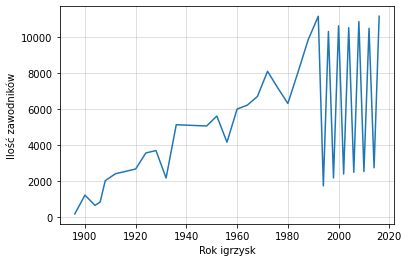

In [ ]:
years = athletes['Year'].sort_values(ascending=True).unique()
num_of_athletes = []
for year in years:
    num_of_athletes.append(len(athletes[athletes['Year'] == year]['Name'].unique()))

fig, ax = plt.subplots()
ax.plot(years, num_of_athletes)

plt.xlabel('Rok igrzysk')
plt.ylabel('Ilość zawodników')
plt.grid(axis='both', alpha=0.5)
plt.plot()

10. Wyświetlić wykres kołowy, który będzie pokazywał rozkłąd ilości startów zanotowanych przez mężczyzn i przez kobiety.

In [ ]:
sex_count = athletes_medalist.groupby(by='Sex').count()['ID'].values
sex_count

array([10350, 19846], dtype=int64)

In [ ]:
import matplotlib.pyplot as plt
labels = ['Kobiety', 'Mężczyźni']
sizes = sex_count

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', wedgeprops = {"edgecolor" : "black",
                      'linewidth': 2,
                      'antialiased': True}, 
                      textprops={'fontsize': 16})
plt.show()

NameError: name 'sex_count' is not defined

11. Napisać skrypt, który wygeneruje plik xlsx, w którym w zależności od podanych parametrów znajdą się odpowiednie dane w osobnych arkuszach

In [ ]:
def generate_xlsx(data, country='', gender='', year=''):
    if country != '':
        data = data[data['Team'] == country]
    if gender != '':
        data = data[data['Sex'] == gender]
    if year != '':
        data = data[data['Year'] == year]
    
    if len(data) == 0:
        print('Brak wierszy dla podanych filtrów')
        return
        
    athletes_names = data['Name'].unique()

    filename = ''
    if country == '' and gender == '' and year == '':
        filename = 'athletes'
    else:
        if country != '': 
            filename = f'{country}_'
        if gender != '':
            filename += f'{gender}_'
        if year != '':
            filename += f'{year}'

    with pd.ExcelWriter(f'{filename}.xlsx') as writer:  
        for name in athletes_names:
            athlete_data = data[data['Name']==name]
            athlete_data.to_excel(writer, sheet_name=name)


In [ ]:
# Parameters
country = 'Finland'
gender = 'M'
year = 1994

In [ ]:
generate_xlsx(athletes, country=country, gender=gender, year=year)